## **IMPORTING** **LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

2023-09-15 16:20:16.469648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-15 16:20:16.596932: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-15 16:20:16.597727: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 16:20:17.728626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## **Loading the historical stock price dataset**

In [4]:
df = pd.read_csv('TSLAA.csv')


## **Sorting by date**

In [5]:
# Sort by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

# Select the 'Close' price as the target variable
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define the look-back window for time series data
look_back = 60


## **Data Training**

In [6]:
# Create sequences of data for training
X, y = [], []
for i in range(len(data) - look_back):
    X.append(data[i:(i + look_back), 0])
    y.append(data[i + look_back, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LSTM model with advanced features
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

## **Compiling, Training & Prediction of the data**

In [7]:
# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Add dropout layers to reduce overfitting
model.add(Dropout(0.2))

# Train the model with a larger number of epochs
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Epoch 1/50
82/82 [==============================] - 10s 68ms/step - loss: 0.0216
Epoch 2/50
82/82 [==============================] - 5s 66ms/step - loss: 0.0179
Epoch 3/50
82/82 [==============================] - 6s 70ms/step - loss: 0.0179
Epoch 4/50
82/82 [==============================] - 6s 77ms/step - loss: 0.0188
Epoch 5/50
82/82 [==============================] - 5s 66ms/step - loss: 0.0162
Epoch 6/50
82/82 [==============================] - 6s 68ms/step - loss: 0.0178
Epoch 7/50
82/82 [==============================] - 6s 69ms/step - loss: 0.0168
Epoch 8/50
82/82 [==============================] - 6s 70ms/step - loss: 0.0179
Epoch 9/50
82/82 [==============================] - 6s 77ms/step - loss: 0.0157
Epoch 10/50
82/82 [==============================] - 5s 66ms/step - loss: 0.0177
Epoch 11/50
82/82 [==============================] - 6s 79ms/step - loss: 0.0183
Epoch 12/50
82/82 [==============================] - 7s 88ms/step - loss: 0.0158
Epoch 13/50
82/82 [=================

## **Visual Representation**

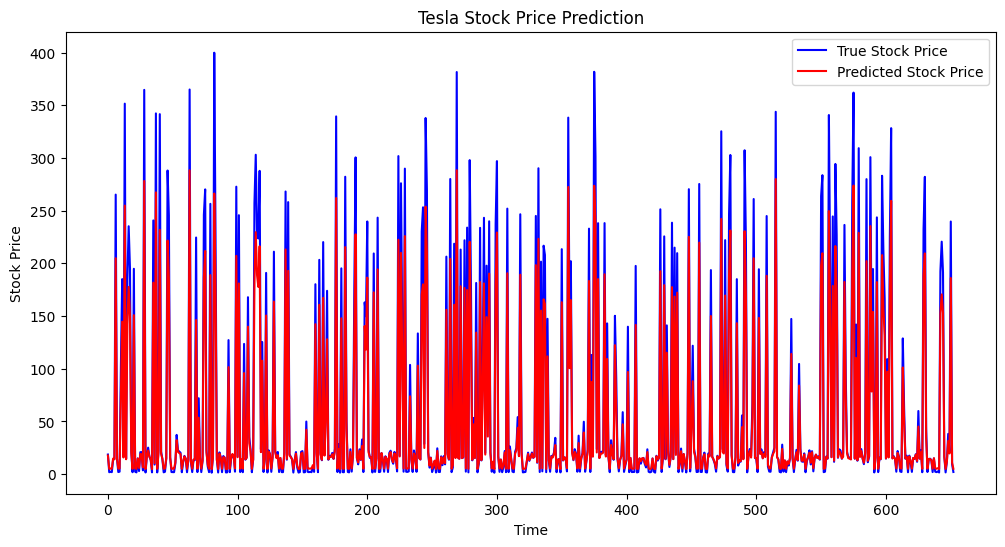

<Figure size 640x480 with 0 Axes>

In [21]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Stock Price', color='blue')
plt.plot(y_pred, label='Predicted Stock Price', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
plt.savefig('my_plot.png')

In [20]:
np.savetxt("actual.csv", y_test)
np.savetxt("predicted.csv", y_pred)